#  Type of glasses 

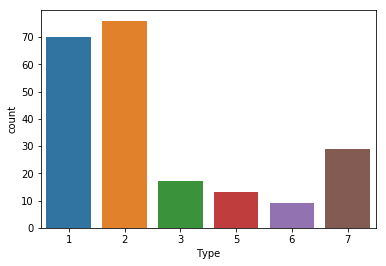

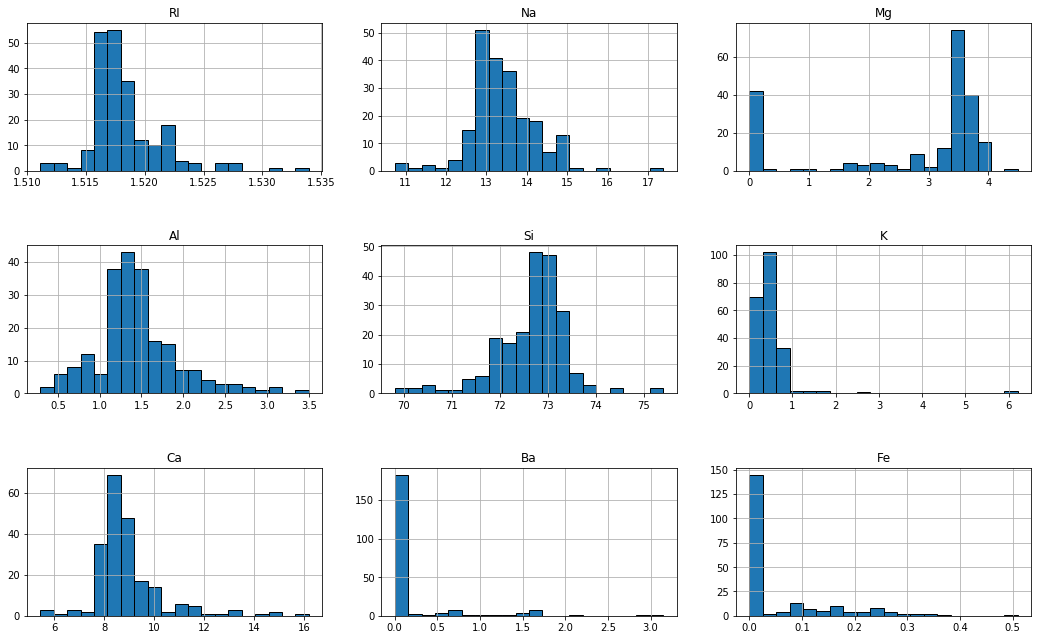

pred=  [7 1 2 5 5 2 1 2 1 2 1 1 2 2 2 7 1 1 2 2 5 1 7 7 1 1 7 1 2 1 1 1 2 1 1 1 1
 2 1 7 5 7 2 1 1 2 1 2 2 2 1 2 7 1]
The accuracy of the svm is 0.6481481481481481
The accuracy of the Logistic Regression is 0.5740740740740741
The accuracy of the Decision Tree is 0.6851851851851852
The accuracy of the KNeighbors is 0.7222222222222222
The accuracy of the Random Forest is 0.7407407407407407
The accuracy of the Extra Tree is 0.7407407407407407


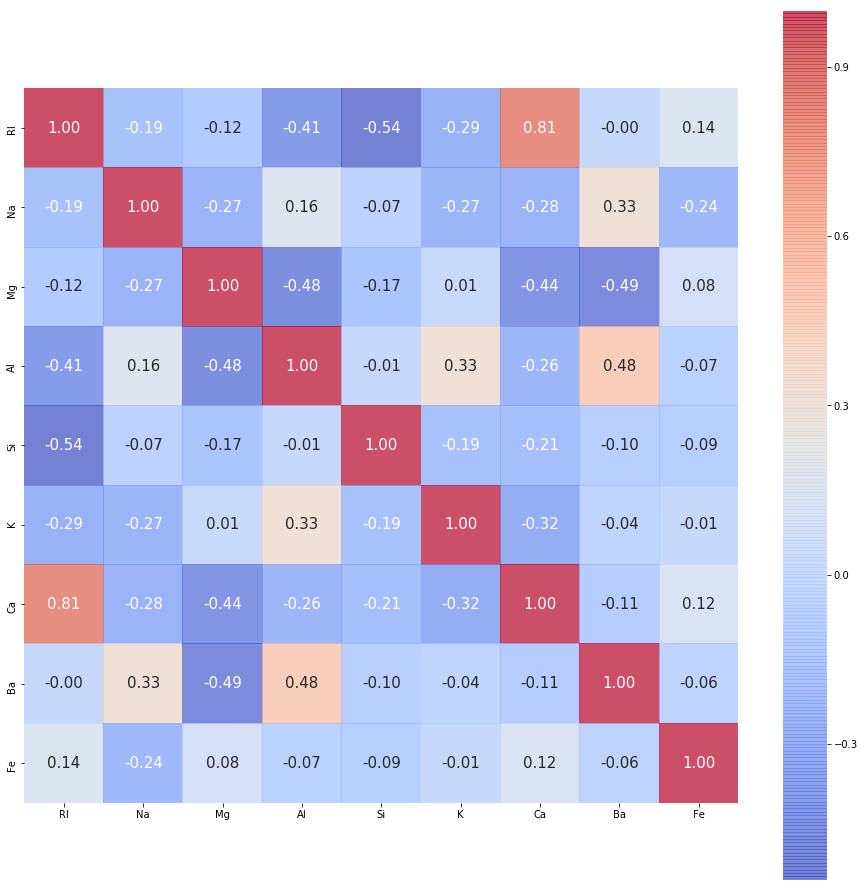

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.7min finished


-------Best score----------
68.75
-------Best params----------
{'rfc__max_depth': None, 'rfc__max_features': 0.05, 'rfc__min_samples_split': 0.005, 'rfc__n_estimators': 100}
The accuracy of the Random Forest is 0.7592592592592593


In [70]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=pd.read_csv('glass.csv')

#TO SCALE USING StandardScaler (all features are scaled)
scaler=StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)

sns.countplot(x='Type',data=data)
plt.show()

columns=data.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i) 
plt.show()

y=data['Type']
data.drop('Type',axis=1,inplace=True)
# X_train,X_test,Y_train,Y_test=train_test_split(data,y,test_size=0.25,random_state=0)


pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

X_train,X_test,Y_train,Y_test=train_test_split(x_pca,y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("pred= ",y_pred)
print('The accuracy of the svm is',accuracy_score(y_pred, Y_test))


model = LogisticRegression()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',accuracy_score(prediction,Y_test))

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,Y_test))

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
print('The accuracy of the KNeighbors is',metrics.accuracy_score(prediction,Y_test))

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
print('The accuracy of the Random Forest is',rf.score(X_test,Y_test))

etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('The accuracy of the Extra Tree is',etc.score(X_test,Y_test))

columns=data.columns[:9]
corr = data[columns].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= columns, yticklabels= columns, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Create a pipeline with a Random forest classifier
pipe_rfc = Pipeline([ 
                      ('scl', StandardScaler()), 
                    ('rfc', RandomForestClassifier(random_state=7, n_jobs=-1) )])

# Set the grid parameters
param_grid_rfc =  [ {
    'rfc__n_estimators': [100, 200,300,400], # number of estimators
    'rfc__max_features':[0.05 , 0.1], # maximum features used at each split
    'rfc__max_depth': [None, 5], # Max depth of the trees
    'rfc__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
# Use 10 fold CV
kfold = KFold(n_splits=10, random_state= 7)
grid_rfc = GridSearchCV(pipe_rfc, param_grid= param_grid_rfc, cv=kfold, scoring='accuracy', verbose= 1, n_jobs=-1)

#Fit the pipeline

grid_rfc = grid_rfc.fit(X_train, Y_train)
# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

# Finally using Random Forest

rf=RandomForestClassifier(criterion='gini',random_state=7,n_estimators=100,max_depth=None,min_samples_split=0.005,max_features=0.05)
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(y_pred,Y_test))
